In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


C:\Users\surajshukla\AppData\Local\Temp\ipykernel_19232\3630005274.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("medical_insurance_preprocessed.csv")

features = df.columns

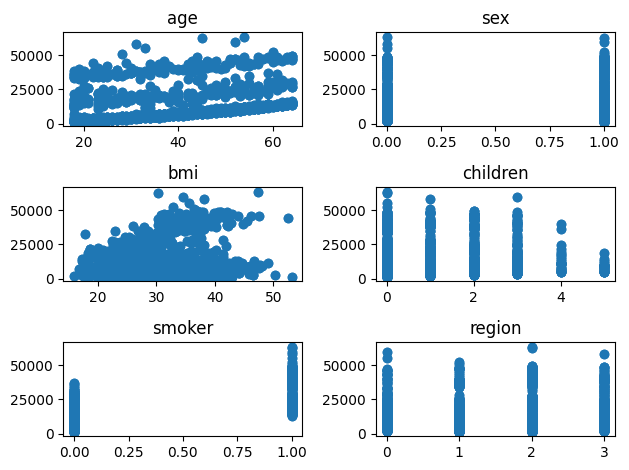

In [3]:
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.scatter(df[features[i]], df[features[6]])
    plt.title(features[i])

plt.tight_layout()
plt.show()

In [4]:
y = np.array(df['charges'])
X = np.array(df.drop(columns=['charges'], axis=1))

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the training set into training and cross-validation sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(X_train[:5])

[[57.    1.   31.54  0.    0.    0.  ]
 [46.    0.   32.3   2.    0.    3.  ]
 [32.    0.   23.65  1.    0.    2.  ]
 [42.    1.   26.07  1.    1.    2.  ]
 [23.    0.   31.4   0.    1.    1.  ]]


In [6]:
model = LinearRegression()

In [7]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train = scaler_linear.fit_transform(X_train)

In [8]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [9]:
X_test = scaler_linear.transform(X_test)
X_CV = scaler_linear.transform(X_cv)


In [10]:
y_pred = model.predict(X_test)

In [11]:
mean_absolute_error(y_test,y_pred)
mean_absolute_percentage_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)

41559941.67304067

In [12]:
y_pred = model.predict(X_CV)

In [13]:
mean_absolute_error(y_cv,y_pred)
mean_absolute_percentage_error(y_cv,y_pred)
mean_squared_error(y_cv,y_pred)

35092839.59780349

In [14]:
y_pred = model.predict(X_train)

In [15]:
mean_absolute_error(y_train,y_pred)
mean_absolute_percentage_error(y_train,y_pred)
mean_squared_error(y_train,y_pred)

36150114.990534194